In [1]:
%cd /Users/floriankokoszka/Desktop/notebooks
%pwd

%run mc_startup.ipynb
%run myfunctions.ipynb
%run myfunctions_plus.ipynb

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import xarray as xr

/Users/floriankokoszka/Desktop/notebooks


In [2]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import mat73
from datetime import datetime, timedelta

In [3]:
import glob
import os
import time

In [4]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm


In [5]:
import os
import glob
from scipy.io import loadmat

# chemin vers le dossier
data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/GFM/'

# trouver tous les fichiers .mat
mat_files = glob.glob(os.path.join(data_dir, '*.mat'))

# listes pour accumuler les données
list_GFM = []
list_ts = []
list_lon = []
list_lat = []
list_YYYY = []
list_MM = []
list_DD = []
list_HH = []
list_MN = []
list_SS = []

list_C = []
list_T = []
list_P = []
list_SP = []
list_SA = []
list_rho = []
list_time = []
list_aoa = []
list_horizontalspeed = []
list_verticalspeed = []
list_verticalwatervelocity = []

list_pitch = []
list_roll = []
list_buoyancy_change = []
           

for file in mat_files:
    mat = loadmat(file, squeeze_me=True)
    # on suppose que la structure s'appelle 'GFM' dans le .mat
    G = mat.get('GFM')
    if G is None:
        print('No GFM')
        continue
    # extraire les champs
    #gm_U = mat.get('GFM')    # gm.U
    #tctd = mat.get('timestamp')
    #alpha = mat.get('angleofattack')
    # accumuler
    #list_GFM.append(np.atleast_1d(gm_U))
    #list_timestamp.append(np.atleast_1d(tctd))
    #list_angle.append(np.atleast_1d(alpha))
    
    list_GFM.append(np.atleast_1d(mat.get('GFM')))
    list_ts.append(np.atleast_1d(mat.get('timestamp')))
    list_lon.append(np.atleast_1d(mat.get('lon')))
    list_lat.append(np.atleast_1d(mat.get('lat')))
    list_YYYY.append(np.atleast_1d(mat.get('YYYY')))
    list_MM.append(np.atleast_1d(mat.get('MM')))
    list_DD.append(np.atleast_1d(mat.get('DD')))
    list_HH.append(np.atleast_1d(mat.get('HH')))
    list_MN.append(np.atleast_1d(mat.get('MN')))
    list_SS.append(np.atleast_1d(mat.get('SS')))
    list_C.append(np.atleast_1d(mat.get('C')))
    list_T.append(np.atleast_1d(mat.get('T')))
    list_P.append(np.atleast_1d(mat.get('P')))
    list_SP.append(np.atleast_1d(mat.get('SP')))
    list_SA.append(np.atleast_1d(mat.get('SA')))
    list_rho.append(np.atleast_1d(mat.get('rho')))
    list_time.append(np.atleast_1d(mat.get('time')))
    list_aoa.append(np.atleast_1d(mat.get('angleofattack')))
    list_horizontalspeed.append(np.atleast_1d(mat.get('horizontalspeed')))
    list_verticalspeed.append(np.atleast_1d(mat.get('erticalspeed')))
    list_verticalwatervelocity.append(np.atleast_1d(mat.get('verticalwatervelocity')))
    
    list_pitch.append(np.atleast_1d(mat.get('pitch')))
    list_roll.append(np.atleast_1d(mat.get('roll')))
    list_buoyancy_change.append(np.atleast_1d(mat.get('buoyancy_change')))
    



    GFM_gl = np.concatenate(list_GFM)
    ts_gl = np.concatenate(list_ts)
    lon_gl = np.concatenate(list_lon)
    lat_gl = np.concatenate(list_lat)
    YYYY_gl = np.concatenate(list_YYYY)
    MM_gl = np.concatenate(list_MM)
    DD_gl = np.concatenate(list_DD)
    HH_gl = np.concatenate(list_HH)
    MN_gl = np.concatenate(list_MN)
    SS_gl = np.concatenate(list_SS)
    C_gl = np.concatenate(list_C)
    T_gl = np.concatenate(list_T)
    P_gl = np.concatenate(list_P)
    SP_gl = np.concatenate(list_SP)
    SA_gl = np.concatenate(list_SA)
    rho_gl = np.concatenate(list_rho)
    time_gl = np.concatenate(list_time)
    aoa_gl = np.concatenate(list_aoa)
    hspeed_gl = np.concatenate(list_horizontalspeed)
    vspeed_gl = np.concatenate(list_verticalspeed)
    vwaterspeed_gl = np.concatenate(list_verticalwatervelocity)
    
    pitch_gl = np.concatenate(list_pitch)
    roll_gl = np.concatenate(list_roll)
    buoyancy_change_gl = np.concatenate(list_buoyancy_change)
    


    
print('Done')


Done


In [6]:
YYYY_gl = np.array(YYYY_gl)
MM_gl = np.array(MM_gl)
DD_gl = np.array(DD_gl)
HH_gl = np.array(HH_gl)
MN_gl = np.array(MN_gl)
SS_gl = np.array(SS_gl)
from datetime import datetime
def matlab_datenum(YYYY, MM, DD, HH=0, MN=0, SS=0):
    dt = datetime(YYYY, MM, DD, HH, MN, SS)
    mdn = dt.toordinal() + 366 + (dt.hour + dt.minute/60 + dt.second/3600)/24
    return mdn
dn_gl = YYYY_gl*np.nan
for l in range(0,len(YYYY_gl)):
    dn_gl[l] = matlab_datenum(YYYY_gl[l], MM_gl[l], DD_gl[l], HH_gl[l], MN_gl[l], SS_gl[l])

#----------   
# Création du temps Unix
unix_times = np.array([
    datetime(y, m, d, h, mn, s).timestamp()
    for y, m, d, h, mn, s in zip(YYYY_gl, MM_gl, DD_gl, HH_gl, MN_gl, SS_gl)
])
dn_gl = unix_times 



_, io = np.unique(dn_gl, return_index=True)

GFM_gl = np.array(GFM_gl)[io]
ts_gl = np.array(ts_gl)[io]
lon_gl = np.array(lon_gl)[io]
lat_gl = np.array(lat_gl)[io]
YYYY_gl = np.array(YYYY_gl)[io]
MM_gl = np.array(MM_gl)[io]
DD_gl = np.array(DD_gl)[io]
HH_gl = np.array(HH_gl)[io]
MN_gl = np.array(MN_gl)[io]
SS_gl = np.array(SS_gl)[io]
C_gl = np.array(C_gl)[io]
T_gl = np.array(T_gl)[io]
P_gl = np.array(P_gl)[io]
SP_gl = np.array(SP_gl)[io]
SA_gl = np.array(SA_gl)[io]
rho_gl = np.array(rho_gl)[io]
time_gl = np.array(time_gl)[io]
aoa_gl = np.array(aoa_gl)[io]
#hspeed_gl = np.array(hspeed_gl)[io]
#vspeed_gl = np.array(vspeed_gl)[io]
#vwaterspeed_gl = np.array(vwaterspeed_gl)[io]
pitch_gl = np.array(pitch_gl)[io]
roll_gl = np.array(roll_gl)[io]
buoyancy_change_gl = np.array(buoyancy_change_gl)[io]
dn_gl = np.array(dn_gl)[io]
    
print('Unique')

Unique


In [7]:
from datetime import datetime
import pytz
import numpy as np

def corriger_offset_timezone(dn_gl, YYYY, MM, DD, HH, MN, SS):
    """
    Applique une correction de fuseau horaire (3600 ou 7200 s) à dn_gl
    selon la date locale (Europe/Paris). Retourne dn_gl_corr en UTC.
    """
    tz_local = pytz.timezone("Europe/Paris")

    # Calcul de l’offset horaire (en secondes) pour chaque datetime
    offsets = np.array([
        tz_local.localize(datetime(y, m, d, h, mn, s)).utcoffset().total_seconds()
        for y, m, d, h, mn, s in zip(YYYY, MM, DD, HH, MN, SS)
    ])

    # Application de la correction
    dn_gl_corr = dn_gl - offsets

    return dn_gl_corr

In [8]:
# Correction fuseau → UTC
dn_gl_utc = corriger_offset_timezone(dn_gl, YYYY_gl, MM_gl, DD_gl, HH_gl, MN_gl, SS_gl)


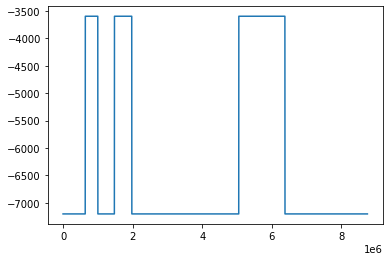

In [77]:
plt.plot(dn_gl_utc-dn_gl)

Text(0, 0.5, 'lat')

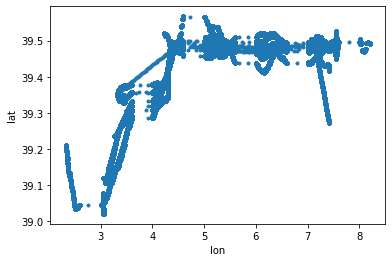

In [16]:
plt.plot(lon_gl,lat_gl,'.')
plt.xlabel('lon')
plt.ylabel('lat')

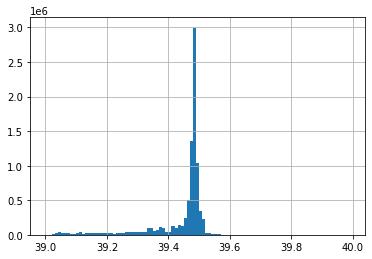

In [13]:
plt.hist(lat_gl,bins=np.arange(39,40,.01))
plt.grid()

Text(0, 0.5, 'COUNT')

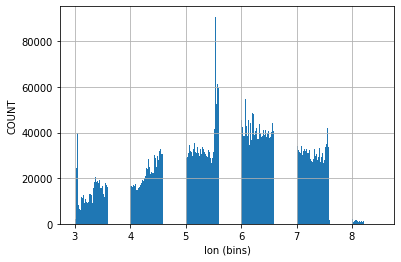

In [17]:
plt.hist(lon_gl,bins=np.arange(3,8.5,.01))
plt.grid()
plt.xlabel('lon (bins)')
plt.ylabel('COUNT')

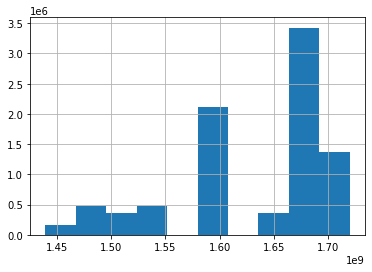

In [11]:
plt.hist(ts_gl)
plt.grid()

In [62]:
len(lat_gl)
len(aoa_gl)
len(vwaterspeed_gl)
#len(vspeed_gl)

10

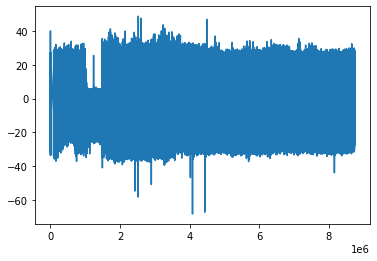

In [64]:
plt.plot(np.degrees(pitch_gl))


In [78]:
io = np.argsort(dn_gl)

GFM_gl = np.array(GFM_gl)[io]
ts_gl = np.array(ts_gl)[io]
lon_gl = np.array(lon_gl)[io]
lat_gl = np.array(lat_gl)[io]
YYYY_gl = np.array(YYYY_gl)[io]
MM_gl = np.array(MM_gl)[io]
DD_gl = np.array(DD_gl)[io]
HH_gl = np.array(HH_gl)[io]
MN_gl = np.array(MN_gl)[io]
SS_gl = np.array(SS_gl)[io]
C_gl = np.array(C_gl)[io]
T_gl = np.array(T_gl)[io]
P_gl = np.array(P_gl)[io]
SP_gl = np.array(SP_gl)[io]
SA_gl = np.array(SA_gl)[io]
rho_gl = np.array(rho_gl)[io]
time_gl = np.array(time_gl)[io]
aoa_gl = np.array(aoa_gl)[io]
#hspeed_gl = np.array(hspeed_gl)[io]
#vspeed_gl = np.array(vspeed_gl)[io]
#vwaterspeed_gl = np.array(vwaterspeed_gl)[io]
pitch_gl = np.array(pitch_gl)[io]
roll_gl = np.array(roll_gl)[io]
buoyancy_change_gl = np.array(buoyancy_change_gl)[io]
dn_gl = np.array(dn_gl)[io]
dn_gl_utc = np.array(dn_gl_utc)[io]

print('Sorted')




io = np.where(np.isnan(GFM_gl)==False)[0]
GFM_gl = np.array(GFM_gl)[io]
ts_gl = np.array(ts_gl)[io]
lon_gl = np.array(lon_gl)[io]
lat_gl = np.array(lat_gl)[io]
YYYY_gl = np.array(YYYY_gl)[io]
MM_gl = np.array(MM_gl)[io]
DD_gl = np.array(DD_gl)[io]
HH_gl = np.array(HH_gl)[io]
MN_gl = np.array(MN_gl)[io]
SS_gl = np.array(SS_gl)[io]
C_gl = np.array(C_gl)[io]
T_gl = np.array(T_gl)[io]
P_gl = np.array(P_gl)[io]
SP_gl = np.array(SP_gl)[io]
SA_gl = np.array(SA_gl)[io]
rho_gl = np.array(rho_gl)[io]
time_gl = np.array(time_gl)[io]
aoa_gl = np.array(aoa_gl)[io]
#hspeed_gl = np.array(hspeed_gl)[io]
#vspeed_gl = np.array(vspeed_gl)[io]
#vwaterspeed_gl = np.array(vwaterspeed_gl)[io]
pitch_gl = np.array(pitch_gl)[io]
roll_gl = np.array(roll_gl)[io]
buoyancy_change_gl = np.array(buoyancy_change_gl)[io]

dn_gl = np.array(dn_gl)[io]
dn_gl_utc = np.array(dn_gl_utc)[io]

print('UnNaNeD')

Sorted


UnNaNeD


In [80]:
datetime.fromtimestamp(ts_gl[0])
datetime.fromtimestamp(ts_gl[-1])
print(datetime.fromtimestamp(np.nanmin(ts_gl)))
print(datetime.fromtimestamp(np.nanmax(ts_gl)))

2015-08-11 16:21:25.591350
2024-07-04 09:37:29.435970


### SAVE HOTEL

### GPS

In [19]:
import os
import glob
from scipy.io import loadmat

# chemin vers le dossier
data_dir = '/Users/floriankokoszka/Desktop/data/glider/teresa/GPS/'

# trouver tous les fichiers .mat
mat_files = glob.glob(os.path.join(data_dir, '*.mat'))

# listes pour accumuler les données
list_ts = []
list_lon = []
list_lat = []
list_YYYY = []
list_MM = []
list_DD = []
list_HH = []
list_MN = []
list_SS = []

           

for file in mat_files:
    mat = loadmat(file, squeeze_me=True)
    
    
    list_ts.append(np.atleast_1d(mat.get('timestamp')))
    list_lon.append(np.atleast_1d(mat.get('lon')))
    list_lat.append(np.atleast_1d(mat.get('lat')))
    list_YYYY.append(np.atleast_1d(mat.get('YYYY')))
    list_MM.append(np.atleast_1d(mat.get('MM')))
    list_DD.append(np.atleast_1d(mat.get('DD')))
    list_HH.append(np.atleast_1d(mat.get('HH')))
    list_MN.append(np.atleast_1d(mat.get('MN')))
    list_SS.append(np.atleast_1d(mat.get('SS')))
    



    ts_gl = np.concatenate(list_ts)
    lon_gl = np.concatenate(list_lon)
    lat_gl = np.concatenate(list_lat)
    YYYY_gl = np.concatenate(list_YYYY)
    MM_gl = np.concatenate(list_MM)
    DD_gl = np.concatenate(list_DD)
    HH_gl = np.concatenate(list_HH)
    MN_gl = np.concatenate(list_MN)
    SS_gl = np.concatenate(list_SS)
    
    


    
print('Done')


Done


In [20]:
YYYY_gl = np.array(YYYY_gl)
MM_gl = np.array(MM_gl)
DD_gl = np.array(DD_gl)
HH_gl = np.array(HH_gl)
MN_gl = np.array(MN_gl)
SS_gl = np.array(SS_gl)
from datetime import datetime
def matlab_datenum(YYYY, MM, DD, HH=0, MN=0, SS=0):
    dt = datetime(YYYY, MM, DD, HH, MN, SS)
    mdn = dt.toordinal() + 366 + (dt.hour + dt.minute/60 + dt.second/3600)/24
    return mdn
dn_gl = YYYY_gl*np.nan
for l in range(0,len(YYYY_gl)):
    dn_gl[l] = matlab_datenum(YYYY_gl[l], MM_gl[l], DD_gl[l], HH_gl[l], MN_gl[l], SS_gl[l])

#----------   
# Création du temps Unix
unix_times = np.array([
    datetime(y, m, d, h, mn, s).timestamp()
    for y, m, d, h, mn, s in zip(YYYY_gl, MM_gl, DD_gl, HH_gl, MN_gl, SS_gl)
])
dn_gl = unix_times 



_, io = np.unique(dn_gl, return_index=True)

ts_gl = np.array(ts_gl)[io]
lon_gl = np.array(lon_gl)[io]
lat_gl = np.array(lat_gl)[io]
YYYY_gl = np.array(YYYY_gl)[io]
MM_gl = np.array(MM_gl)[io]
DD_gl = np.array(DD_gl)[io]
HH_gl = np.array(HH_gl)[io]
MN_gl = np.array(MN_gl)[io]
SS_gl = np.array(SS_gl)[io]

dn_gl = np.array(dn_gl)[io]
    
print('Unique')

Unique


In [21]:
dn_gl_utc = corriger_offset_timezone(dn_gl, YYYY_gl, MM_gl, DD_gl, HH_gl, MN_gl, SS_gl)


In [22]:
io = np.argsort(dn_gl)


ts_gl = np.array(ts_gl)[io]
lon_gl = np.array(lon_gl)[io]
lat_gl = np.array(lat_gl)[io]
YYYY_gl = np.array(YYYY_gl)[io]
MM_gl = np.array(MM_gl)[io]
DD_gl = np.array(DD_gl)[io]
HH_gl = np.array(HH_gl)[io]
MN_gl = np.array(MN_gl)[io]
SS_gl = np.array(SS_gl)[io]

dn_gl = np.array(dn_gl)[io]
dn_gl_utc = np.array(dn_gl_utc)[io]

print('Sorted')




io = np.where(np.isnan(dn_gl)==False)[0]
ts_gl = np.array(ts_gl)[io]
lon_gl = np.array(lon_gl)[io]
lat_gl = np.array(lat_gl)[io]
YYYY_gl = np.array(YYYY_gl)[io]
MM_gl = np.array(MM_gl)[io]
DD_gl = np.array(DD_gl)[io]
HH_gl = np.array(HH_gl)[io]
MN_gl = np.array(MN_gl)[io]
SS_gl = np.array(SS_gl)[io]


dn_gl = np.array(dn_gl)[io]
dn_gl_utc = np.array(dn_gl_utc)[io]

print('UnNaNeD')

Sorted
UnNaNeD


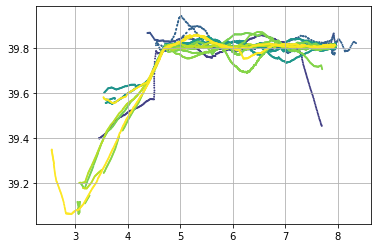

In [23]:
xax = np.arange(0,len(lon_gl),1000) ; 
plt.scatter(lon_gl[xax],lat_gl[xax],s=3,c=ts_gl[xax],marker='.')
plt.grid()

### SAVE HOTEL

In [37]:
dn = dn_gl*1
#dn = dn_gl_utc * 1 

X2  = {'data':lon_gl, 'time':dn}
X3  = {'data':lat_gl, 'time':dn }



In [42]:
dn = ts_gl*1
#dn = dn_gl_utc * 1 

X2  = {'data':lon_gl, 'time':dn}
X3  = {'data':lat_gl, 'time':dn }


In [43]:
X_list = [ X2, X3] #X5, X6, X7

for i, Xi in enumerate(X_list, start=1):
    for key in ['data', 'time']:
        if Xi.get(key) is None:
            print(f"X{i}.{key} is None")

In [44]:
for i, Xi in enumerate(X_list, start=1):
    for key in ['data', 'time']:
        arr = Xi.get(key)
        if isinstance(arr, np.ndarray) and arr.dtype == object:
            if any(x is None for x in arr):
                print(f"X{i}.{key} contient des None dans le tableau")


In [45]:
hotel = { 'lon_gl': X2, 'lat_gl': X3, 
        
        }

In [46]:
from scipy.io import savemat
       
#
out_dir1 = '/Users/floriankokoszka/Desktop/data/glider/teresa/HOTEL/'
out_dir2 = '/Volumes/DENISE/data/glider/teresa/glider/HOTEL/'
out_dir2 = '/Volumes/ORSO/TERESA/glider/GPS/'

out_nam = 'slocum_glider_teresa_gps_for_MR'
#out_nam = 'slocum_glider_teresa_gps_for_MR_UTC'
#
#savemat(out_dir+out_nam+'.mat', {'hotel':hotel})
savemat(out_dir1+out_nam+'.mat', hotel)
savemat(out_dir2+out_nam+'.mat', hotel)

print(out_nam,'\nS A V E D')



slocum_glider_teresa_gps_for_MR 
S A V E D


In [48]:
df = pd.DataFrame()
df['ts_gl'] = ts_gl ; 
df['lon_gl'] = lon_gl ; 
df['lat_gl'] = lat_gl ; 

FNAME = 'df_GPS.csv' 
df.to_csv(out_dir2+FNAME, index = False)
print(out_nam,'\nS A V E D')


In [49]:
df

,ts_gl,lon_gl,lat_gl
0,1.439303e+09,7.817048,39.803115
1,1.439303e+09,7.817048,39.803115
2,1.439303e+09,7.817048,39.803115
3,1.439303e+09,7.817048,39.803115
4,1.439303e+09,7.817048,39.803115
...,...,...,...
8749478,1.720079e+09,2.560401,39.347899
8749479,1.720079e+09,2.560401,39.347897
8749480,1.720079e+09,2.560401,39.347893
8749481,1.720079e+09,2.560401,39.347890
